In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

In [2]:
B_exp = 10
N = 5000
eps_list = np.geomspace(0.1, 5, 10)
alpha = 0.05

eps_to_idx = {eps: i for i, eps in enumerate(eps_list)}

In [3]:
with open(f'results/noisy_binary_search/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_GP = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/success.pkl', 'rb') as f:
    success_h = pickle.load(f)
    
with open(f'results/noisy_binary_search/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_GP = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/errors.pkl', 'rb') as f:
    error_h = pickle.load(f)
    
with open(f'results/noisy_binary_search/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_noisy = pickle.load(f)
with open(f'results/gretta_price/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_GP = pickle.load(f)
with open(f'results/hierarchical_mechanism/N_{N}/B_exp_{B_exp}/coins.pkl', 'rb') as f:
    coins_h = pickle.load(f)

# Success rate vs. $\varepsilon$ plot

In [4]:
def get_binomial_std(p, n):
    return np.sqrt(p*(1-p)/n)

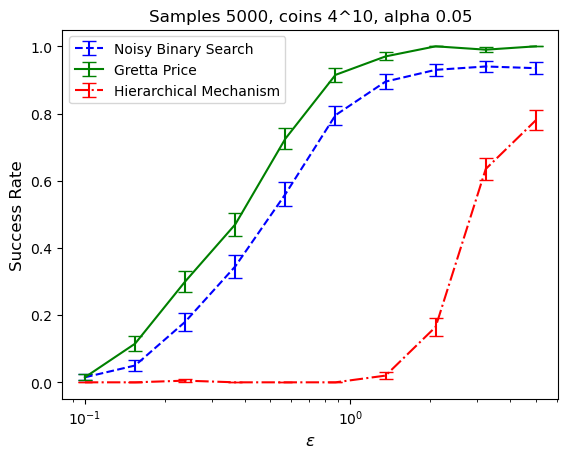

In [5]:
data = [success_noisy, success_GP, success_h]
labels = ["Noisy Binary Search", "Gretta Price", "Hierarchical Mechanism"]
markers = ['--', '-', '-.']
colors = ['b', 'g', 'r']

folder_name = "success_vs_eps"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"

for i, success in enumerate(data):
    plt.errorbar(eps_list, 
                 np.mean(success, axis=1), 
                 yerr=get_binomial_std(np.mean(success, axis=1), success.shape[1]), 
                 fmt=markers[i], 
                 label=labels[i], 
                 color=colors[i],
                 capsize=5)
plt.xscale('log')
plt.xlabel(r'$\varepsilon$', fontsize = 12)
plt.ylabel('Success Rate', fontsize = 12)
plt.title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}")
plt.legend()
plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()

# Error vs. $\varepsilon$ plot

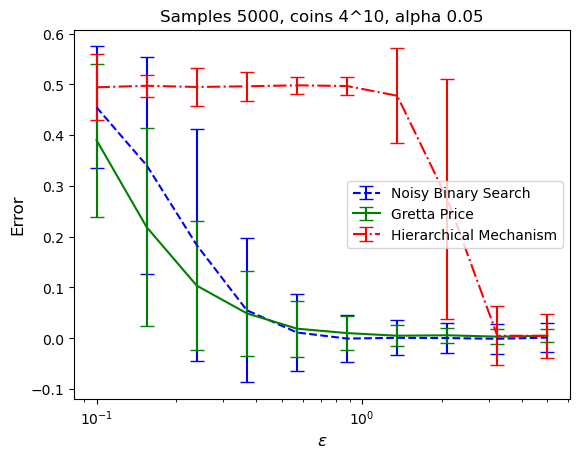

In [6]:
data = [error_noisy, error_GP, error_h]
labels = ["Noisy Binary Search", "Gretta Price", "Hierarchical Mechanism"]
markers = ['--', '-', '-.']
colors = ['b', 'g', 'r']

folder_name = "error_vs_eps"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"

for i, error in enumerate(data):
    plt.errorbar(eps_list, 
                 np.mean(error, axis=1), 
                 yerr=np.std(error, axis=1),
                 fmt=markers[i], 
                 label=labels[i], 
                 color=colors[i],
                 capsize=5)
plt.xscale('log')
plt.xlabel(r'$\varepsilon$', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
plt.title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}")
plt.legend()
plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()

# Coins cdf for fixed epsilon plot

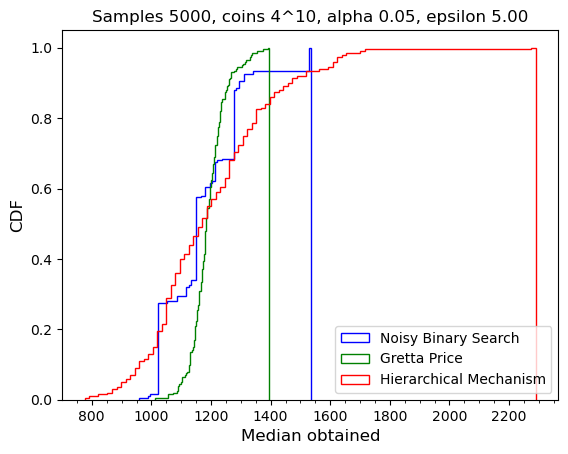

In [7]:
eps = eps_list[9]

eps_id = eps_to_idx[eps]
data = [coins_noisy, coins_GP, coins_h]
labels = ["Noisy Binary Search", "Gretta Price", "Hierarchical Mechanism"]
colors = ['b', 'g', 'r']

folder_name = f"cdf_eps{eps:.2f}"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"

for i, coins in enumerate(data):
    plt.hist(coins[eps_id], bins=100, density=True, histtype='step', cumulative=True, label=labels[i], color=colors[i])
plt.xlabel('Median obtained', fontsize = 12)

# ----- For log x-axis ----- #
# plt.xscale('log')
# 
# # Set major ticks at each power of 10
# plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
# 
# # Set minor ticks to be every 10th of a power of 10
# plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto'))
# 
# # Use ScalarFormatter to display tick labels in a readable way
# plt.gca().xaxis.set_major_formatter(ticker.LogFormatter())
# plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())

# ----- For linear x-axis ----- #
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # Set major ticks to a reasonable number
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())    # Set minor ticks

# Use ScalarFormatter to display tick labels in a readable way
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())   

plt.ylabel('CDF', fontsize = 12)
plt.title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}, epsilon {eps:.2f}")
plt.legend()

plt.savefig(os.path.join("figures", folder_name, figure_name))

plt.show()

# CDF of accuracy

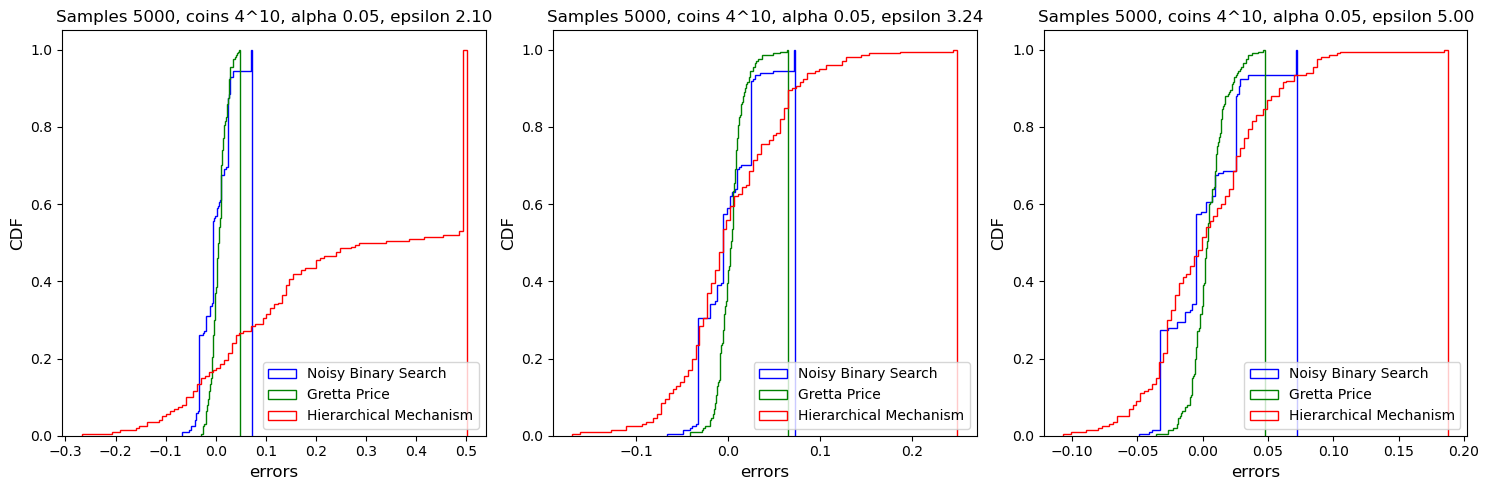

In [8]:
# make three plots in a row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, eps_id in enumerate([7,8,9]):
    eps = eps_list[eps_id]
    
    eps_id = eps_to_idx[eps]
    data = [error_noisy, error_GP, error_h]
    labels = ["Noisy Binary Search", "Gretta Price", "Hierarchical Mechanism"]
    colors = ['b', 'g', 'r']
    
    for j, errors in enumerate(data):
        axs[i].hist(errors[eps_id], bins=100, density=True, histtype='step', cumulative=True, label=labels[j], color=colors[j])
    axs[i].set_xlabel('errors', fontsize = 12)
    axs[i].set_ylabel('CDF', fontsize = 12)
    axs[i].set_title(f"Samples {N}, coins 4^{B_exp}, alpha {alpha}, epsilon {eps:.2f}")
    axs[i].legend()
folder_name = f"cdf_error"
os.makedirs(f"figures/{folder_name}", exist_ok=True)
figure_name = f"N_{N}_Bexp_{B_exp}_alpha_{alpha}.pdf"
plt.tight_layout()
# save
plt.savefig(os.path.join("figures", folder_name, figure_name))
plt.show()